# STEP 1: Libraries Import

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: CSV File Load

In [13]:
df = pd.read_csv("GDP Growth of Pakistan.csv")
df.head()


,World Development Indicator,Unnamed: 1
0,Country Name,Pakistan
1,Indicator Name,GDP growth (annual %)
2,1960,NaN
3,1961,5.987346419
4,1962,4.482858627


# Step 3: Check dataset structure

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   World Development Indicator  64 non-null     object
 1   Unnamed: 1                   63 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB
None


# # Step 2: Check columns

In [23]:
print(df.columns)

Index(['Year', 'GDP'], dtype='object')


# # Step 3: Rename columns (agar zarurat ho)

In [24]:
df.columns = ['Year', 'GDP']

# Step 4: Remove unwanted rows (jahan 'Year' numeric na ho)

In [25]:
df = df[pd.to_numeric(df['Year'], errors='coerce').notnull()]


# # Step 5: Convert columns to correct typ

In [26]:
df['Year'] = df['Year'].astype(int)
df['GDP'] = pd.to_numeric(df['GDP'], errors='coerce')


# Step 6: Handle missing values

In [27]:
df['GDP'].fillna(df['GDP'].median(), inplace=True)

C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_2976\2890053544.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GDP'].fillna(df['GDP'].median(), inplace=True)


# Step 7: Basic stats

In [28]:
avg_gdp = np.mean(df['GDP'])
max_gdp = np.max(df['GDP'])
min_gdp = np.min(df['GDP'])

In [29]:
print("Average GDP:", avg_gdp)
print("Maximum GDP:", max_gdp)
print("Minimum GDP:", min_gdp)


Average GDP: 5.051807175145162
Maximum GDP: 11.35346172
Minimum GDP: -1.329519732


# Step 8: GDP growth % 


In [30]:
df['GDP_Growth_%'] = df['GDP'].pct_change() * 100

In [31]:
print("Highest growth year:\n", df.loc[df['GDP_Growth_%'].idxmax()])
print("Lowest growth year:\n", df.loc[df['GDP_Growth_%'].idxmin()])


Highest growth year:
 Year            1973.000000
GDP                7.064264
GDP_Growth_%     768.479006
Name: 15, dtype: float64
Lowest growth year:
 Year            2021.000000
GDP                6.029752
GDP_Growth_%    -553.528589
Name: 63, dtype: float64


# Step 9: Plot GDP trend

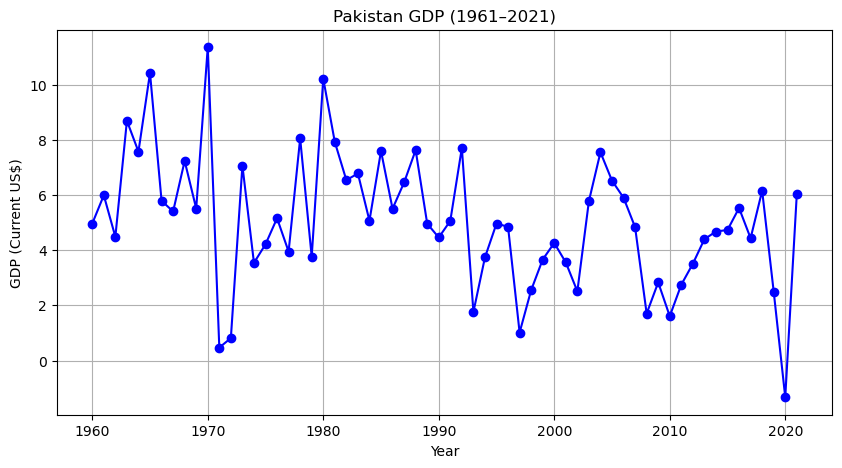

In [32]:
plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['GDP'], marker='o', color='blue')
plt.title("Pakistan GDP (1961–2021)")
plt.xlabel("Year")
plt.ylabel("GDP (Current US$)")
plt.grid(True)
plt.show()


# Step 10: GDP distribution

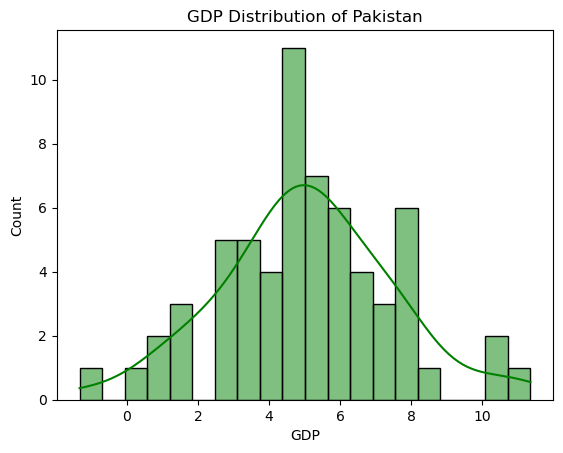

In [33]:
sns.histplot(df['GDP'], bins=20, kde=True, color='green')
plt.title("GDP Distribution of Pakistan")
plt.show()


# Step 11: GDP outliers

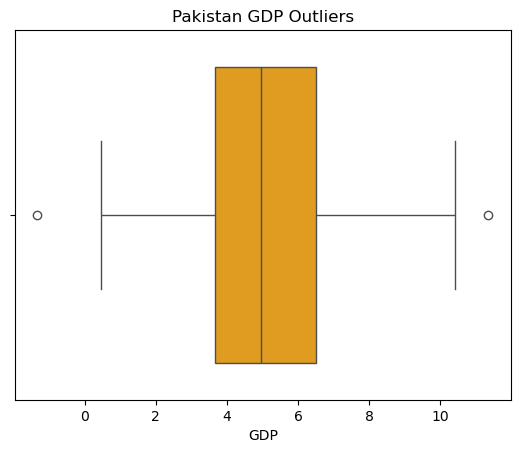

In [34]:
sns.boxplot(x=df['GDP'], color='orange')
plt.title("Pakistan GDP Outliers")
plt.show()